# Define all imports

In [1]:
import string
import nltk
from nltk import word_tokenize, FreqDist, tokenize
from nltk.corpus import stopwords
from xlrd import open_workbook
import re

import wordcloud
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

import pandas as pd

import enchant
d = enchant.Dict("en_US")
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize

In [2]:
newstopwords=stopwords.words("English")
newstopwords=newstopwords+['january','february','march','april','may','june','july','august','september','october','november','december']
newstopwords=newstopwords+['employee','employer','company','approximately','work','right','leave','worker','coworker','catch','back']
newstopwords=newstopwords+['one','two','three','four','five','six','number']
newstopwords=newstopwords+['kill','hospitalization','heart','attack','finger','foot','abdomen','hand','injure','injury','amputate','head','fracture','suffer','cause','treat','treatment','hospital','hospitalize']
newstopwords=newstopwords+['investigation','coworkers','inside','another','area','place','onto','accident','become','part','line','side','break','pull','build','central','inside','time']
WNlemma = nltk.WordNetLemmatizer()

def pre_process(text):
    text=str(text)
    #print(len(text))
    #if not text.isdigit():
    tokens=nltk.word_tokenize(text)
        #print(tokens)
    tokens=[ t.lower() for t in tokens if t not in string.punctuation ]
    tokens=[ WNlemma.lemmatize(t.lower(),pos='v') for t in tokens]
    tokens=[ WNlemma.lemmatize(t.lower(),pos='n') for t in tokens]
    tokens=[ t for t in tokens if t not in newstopwords]
    tokens = [ t for t in tokens if len(t) > 3 ]
    tokens = [word1 for word1 in tokens if not re.search(r'\b\w*\d+\W*\b', word1)] #remove words with digits
    tokens = [word2 for word2 in tokens if not re.search(r'\w*\.+', word2)] #remove words with full stop
    tokens = [word3 for word3 in tokens if d.check(word3)] #remove none english word
    try:
        #print(tokens)
        tokens = [word4[0] for word4 in nltk.pos_tag(tokens) if word4[1]!='VB' ] #get none verb
        #print(tokens)
        text_after_process=" ".join(tokens)
    except:
        print('not working')
        text_after_process=tokens
    return(text_after_process)

def get_freq(text):    
    test=''
    for sublist in text: 
        test=test + ' ' + sublist
    words = nltk.tokenize.word_tokenize(test)
    fdist = FreqDist(words)
    return fdist

def get_Bigram(text):    
    from nltk.corpus import stopwords
    from nltk.collocations import BigramCollocationFinder
    from nltk.metrics import BigramAssocMeasures
   
    test=''
    for sublist in text: 
        test=test + ' ' + sublist
    words = nltk.tokenize.word_tokenize(test)
    bcf = BigramCollocationFinder.from_words(words)
    for m in bcf.nbest(BigramAssocMeasures.likelihood_ratio, 50):
        bigram_result=print(nltk.tag.pos_tag(m))
    return bigram_result

def create_wordcloud(text,title): 
    # We can also generate directly from the frequency information
    wc2 = WordCloud(background_color="white")
    wc2.generate_from_frequencies(text)
    plt.imshow(wc2, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()
    
def get_occupation(text):
    text=str(text)
    sentence_tokenize = sent_tokenize(text)
    
    try:
        searchObj = re.search( r'\(*Employee\)* #1 a (\w+\s\w+\b)', sentence_tokenize[0], re.M|re.I) #extract occupation name
        tokens=nltk.word_tokenize(searchObj.group(1))
        post_tag=nltk.pos_tag(tokens)
        if post_tag[1][1] != 'VBD' and post_tag[1][1] != 'IN':
            print(searchObj.group(1))
        else:
            print(post_tag[0][0])
    except:
        pass

def get_action(text):
    text=str(text)
    sentence_tokenize = sent_tokenize(text.lower())
    
    try:
        searchObj = re.search( r'(was|were) (\D*\s*?\s)', sentence_tokenize[0], re.M|re.I) #extract occupation name
        return searchObj.group(2)
    except:
        pass

# Arrange data in table form using Panda (4 columns from osha file with header as Index, Title, Decription, Support1 and Support2)

In [3]:
news=pd.read_excel('osha.xlsx',header=None,names = ["Index", "Title","Description", "Support1","Support2"])
news.head()

,Index,Title,Description,Support1,Support2
0,201079928,Employee Is Burned By Forklift Radiator Fluid,At approximately 11:30 a.m. on November 13 2...,burn industrial truck waste proc fac pa...,
1,202561825,Employee Falls From Flatbed Trailer And Later...,On August 30 2013 Employee #1 was working f...,truck flatbed truck trailer fall abdomen,
2,200361855,Two Workers Are Struck By Motor Vehicle And O...,On August 27 2013 Employees #1 and #2 of T...,construction undrgrd power line highway ...,1 317290559 Fatality Other Occupation not re...
3,200361863,Employee Is Struck By Bales Of Wire And Killed,On August 26 2013 Employee #1 with Lee Iro...,waste proc fac industrial truck struck b...,
4,201079324,Employee Is Splashed With Hot Water And Is Bu...,On July 14 2013 Employee #1 vacuum pump tr...,truck driver pump tank hot water struc...,


# list down most frequent key words after removing words none related to occupation

In [4]:
# Apply preprocessing to every document in the training set.
decribe = news['Description']
toks_des = decribe.apply(pre_process)

support1 = news['Support1']
toks_support = support1.apply(pre_process)

title = news['Title']
toks_title = title.apply(pre_process)

In [5]:
Description_dist=get_freq(toks_des)
title_dist=get_freq(toks_title)
support1_dist=get_freq(toks_support)

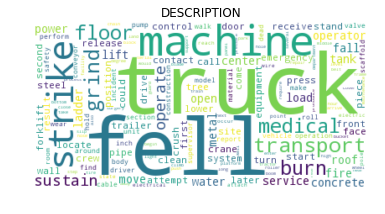

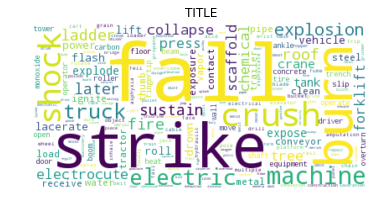

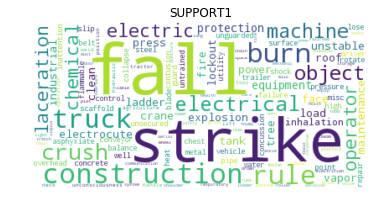

In [6]:
create_wordcloud(Description_dist,"DESCRIPTION")
create_wordcloud(title_dist,"TITLE")
create_wordcloud(support1_dist,"SUPPORT1")

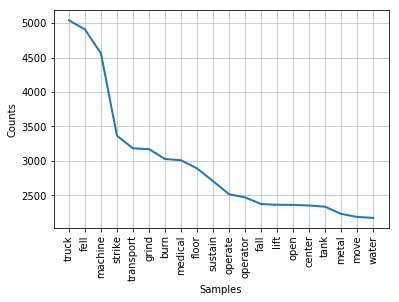

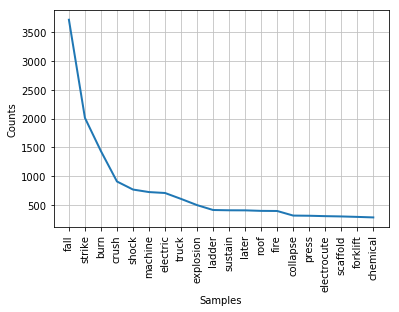

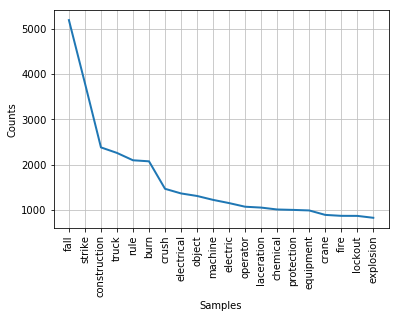

In [7]:
Description_distplot=Description_dist.plot(20)
Title_distplot=title_dist.plot(20)
Support1_distplot=support1_dist.plot(20)

In [ ]:
#comments:
#1) fell and fall appear most frequent which related to construction activity
#2) truck also appear most frequent which related

# Possible list of occupation or work under Description column

In [8]:
likely_occupation = news['Description']
likelyoccup_des = likely_occupation.apply(get_occupation) #extract words (max 2) right after Employee #1
#possible list of name

coowner
service technician
laborer
foundry worker
maintenance man
material handler
cement mixer
welder
garbage collector
farm laborer
mechanic
water pipeline
gardener
framer
general contractor
full time
farm worker
Deputy Sheriff
laborer
tractor driver
machine operator
site attendant
maintenance worker
pest technician
laborer
framer
refrigeration technician
truck driver
window washer
wash second
bee keeper
maintenance technician
Surveyor
tree trimmer
driver


# Extract phrases likely related to work in description column

In [9]:
decribe = news['Description']
toks_des_action = decribe.apply(get_action) # words right after was or were which describe what the person doing at that point in time

# Categories Occupations based on extracting keywords from each case

In [10]:
#the worker title based on heuristic info
occupation_dict=dict({
            'hospital worker':['medicine','medical'],
            'electrician':['electric','electronic','power','transformer','volt'],
            'carpenter':['wood','carpentry'],
            'construction worker':['foreman','construct','construction','ladder','contractor','roof','concrete','fell','fall','cement'],
            'heavy vehicle driver':['truck','forklift','tractor','trailer','crane'],
            'firefighter':['fire','blaze','blast'],
            'machine operator':['machine','tire','vibrator','conveyor','crusher','grind'],
            'shop worker':['supermarket','receptionist','casher'],
            'hotel worker':['motel'],
            'chemical worker':['container','tank','xylene','burn'],
            'wood logger':['yarder','tree'],
            'mower':['grass'],
            'dock worker':['loader','load','terminal','hoist'],
            'painting service':['paint'],
            'cleaner':['vacuum','tank','water'],
            'technician':['equipment','machinery','technician'],
            'mechanic':['maintenance'],
            'derrickman':['pipe','drill'],
            'digger':['excavation'],
            'farmer':['fruit','farmer','farm','blackberries','harverst','grape','picker','gardern'],
            'sales worker':['cash','retail','store'],
            'well puller':['oil'],
            'welder':['welding','vapor','gas'],
            'clerk':['clerk','stockroom']
        })


#keywords=['supermarket','receptionist','trailer','machine','casher','motel','tire','container','tank',
#          'xylene','yarder','tree','yarding','galvanize','strip','frame','roof','ramp','concrete',
#          'cable','mechanic','contractor','jack','crusher','equipment','installer','gondola','tractor',
#          'wagon','derrick','power','transformer','vibrator','volt','shovel','maintenance','hammer','press',
#          'machanical','metal','spin','mold','mantle','vacuum','conveyor','loader','scaffold','ladder','erection',
#          'launder','blast','pipe','machinery','trash','drain','blaze','warehouse','welder','crane','sanitation',
#          'auger','attic','technician','electrical','piles','loading','dock','paint','excavation','hoist','burn',
#          'electric','medicine','mower','hill','snow','haze','water','fire','power','pallet','truck','carpenter',
#          'carpentry','construction','construct','mine','trailer','forklift','foreman','logger','tractor']

# Getting the occurance of the occupation based on how frequent each of the keywords appear on each cases

In [11]:
count=np.zeros((len(occupation_dict)), dtype=np.int)
#print(toks_des_action)
line_tracking=0
for num in toks_des_action: 
    tracking=0
    #print(line_tracking)
    #print(num)
    if num!=None:
        for key,value in occupation_dict.items():
            #print(key)
            for v in value:
                #print(v)
                if num.find(v)>0: 
                    count[tracking]=count[tracking]+1
                    #print(count)
            tracking=tracking+1
    line_tracking=line_tracking+1

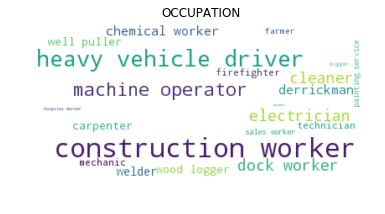

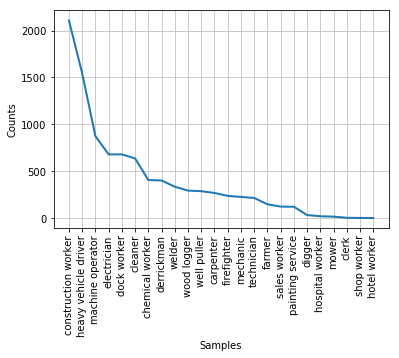

In [12]:
combine=[]
track=0
for key,value in occupation_dict.items():
    #print(key)
    #print(count[track])
    for i in range (0,count[track]-1):
        combine.append(key)
    track=track+1

Occupation_dist = FreqDist(combine)
create_wordcloud(Occupation_dist,"OCCUPATION")
Occupation_distplot=Occupation_dist.plot(len(occupation_dict))